### Exploração e Visualização de Dados 
* Case: https://www.kaggle.com/c/titanic



#### Importando Biblioteca de Funções Turing Lab e Turing IA

In [1]:
%run -i '/home/.Turing/TuringCredentialsAccess.py3'
%run -i '/home/.Turing/TuringLabFunctions.py3'

------------- Turing Lab Data Science --------------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 28/07/2019 -------------------------------
----------------------------------------------------------
--- Consulte o manual de Biblioteca de Funções Turing: ---


----------------------------------------------------------


#### Mapear bibliotecas Python necessárias

In [2]:
import pandas as pd
import numpy as np

#### Gerando credenciais de acesso para lake

In [3]:
id_empresa = '1022'
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)

#### Lendo arquivo armazenado como csv no lake

In [4]:
nm_bucket = 'turing-bkt-treinamentos'
path_file = 'Treinamento/Dados/titanic_kaggle.csv'
df_00 = TuringReadS3File(S3client,nm_bucket,path_file,sep=',')
df_00.shape

Arquivo csv carregado em memoria


(891, 12)

In [5]:
df_00.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Análise de Missings

In [6]:
TuringMissingPlot(df_00)

#### Correlação de Pearson

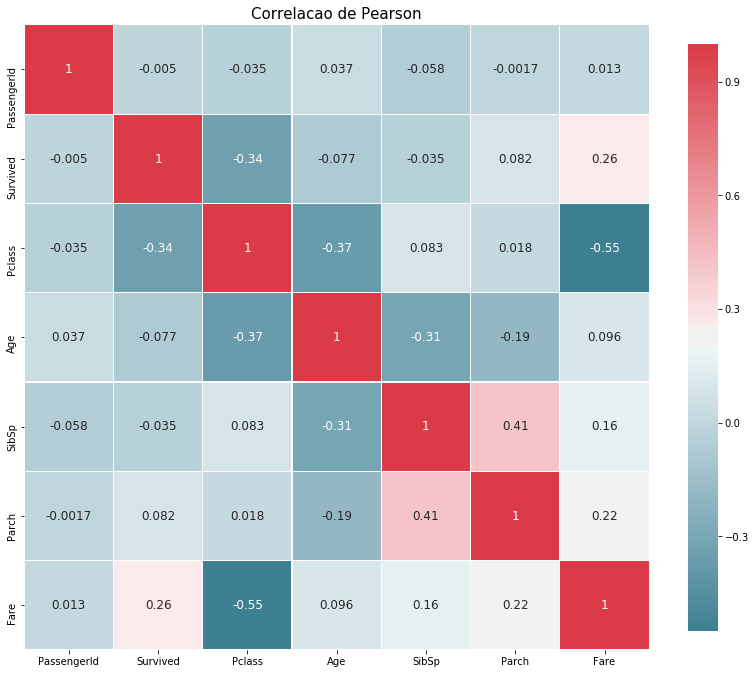

In [7]:
TuringPearsonCorr(df_00)

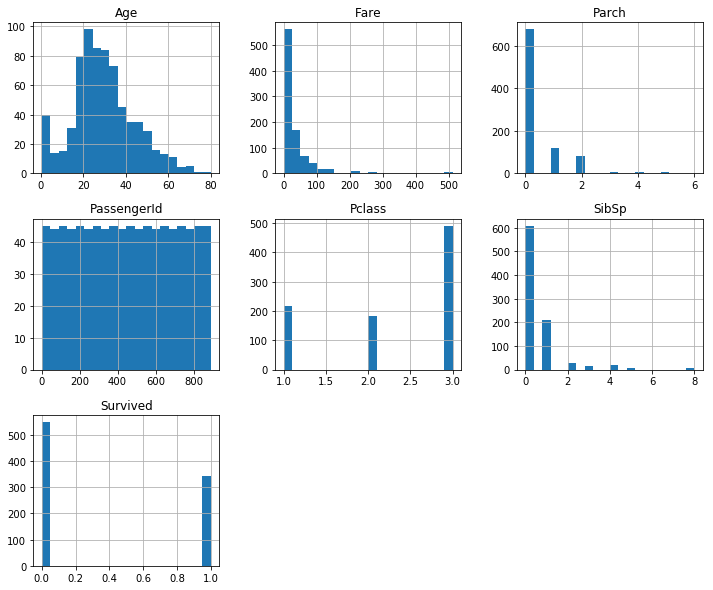

In [8]:
TuringHistogram(df_00)  

#### BoxPlot

In [9]:
lista_boxplot = ['Age','SibSp']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

Turing Visualização de Dados - PairPlot


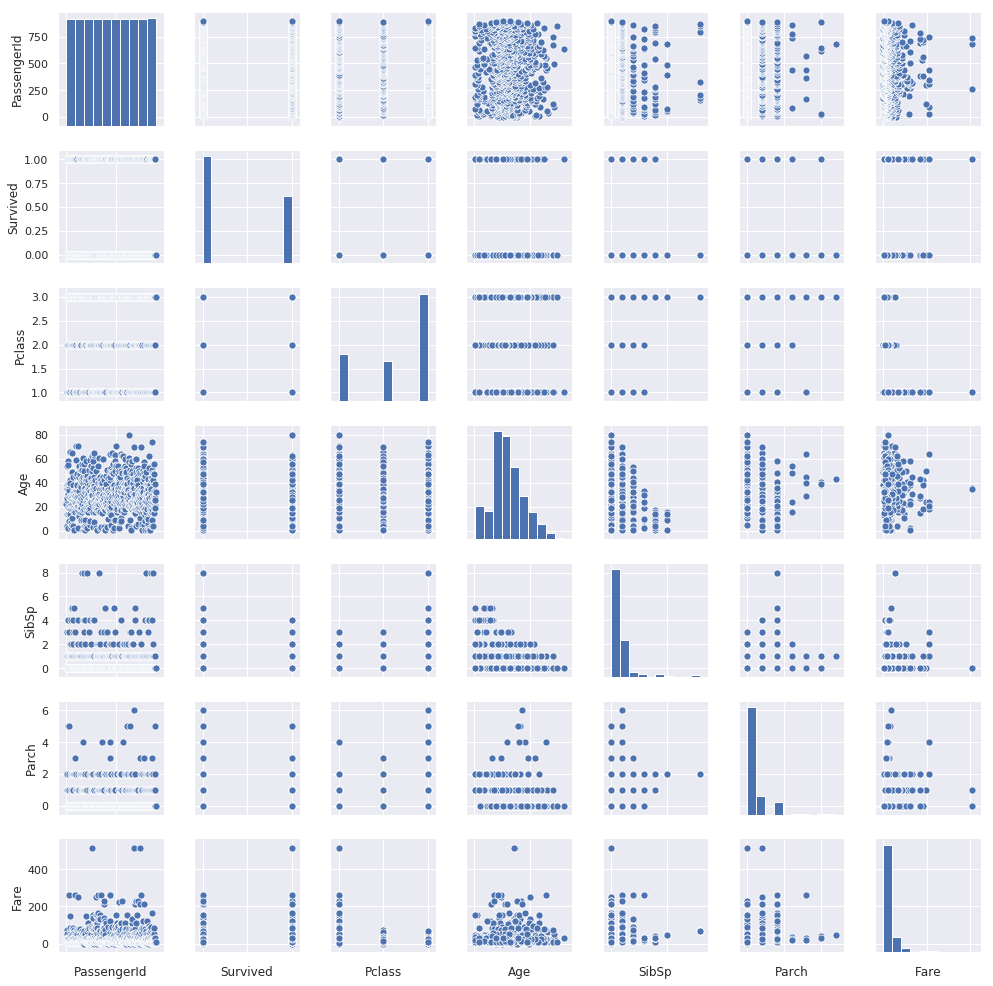

In [11]:
TuringDVPairPlot(df_00,sizegraph=2,plot_s = 50)

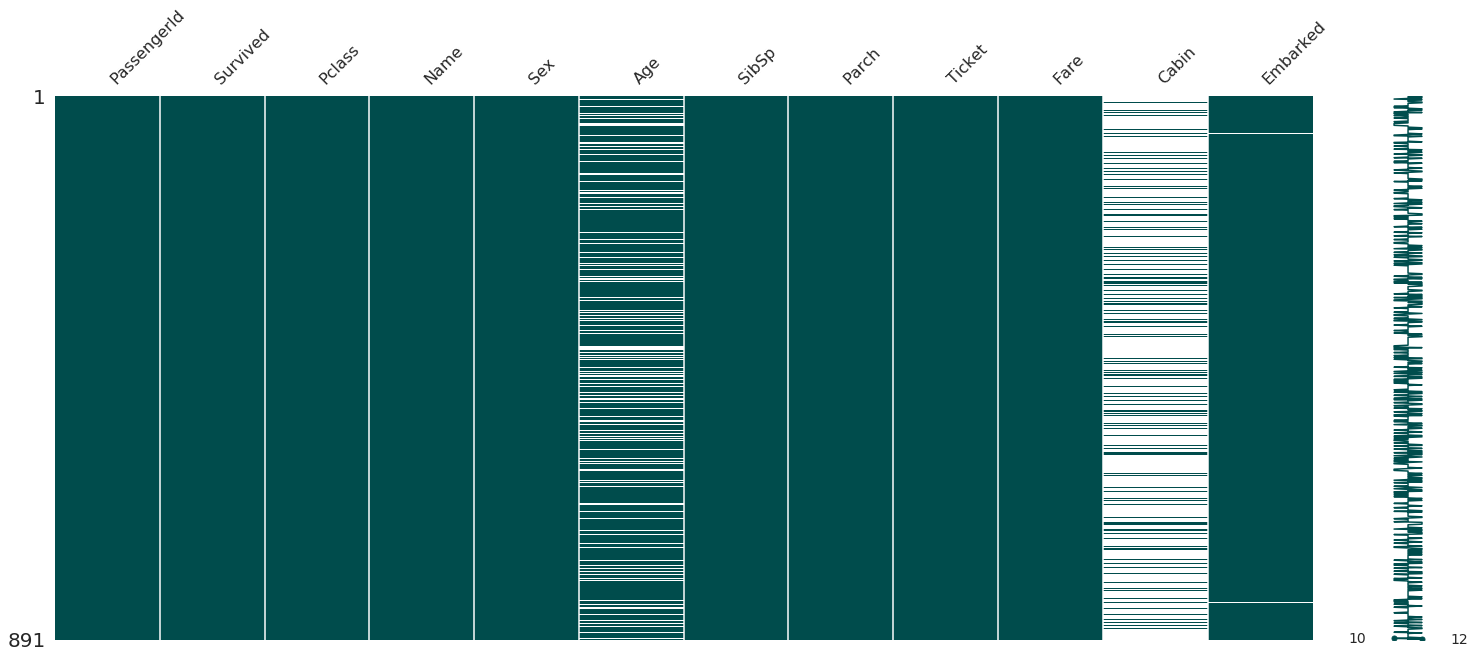

In [47]:
TuringMissingPlot(df_00)

In [46]:
#### Pegando Todas variáveis numéricas menos o target

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_00.select_dtypes(include=numerics)
vars_num = set(df_numeric.columns)
lista_vars = list(vars_num - set(['Survived','Age']))

# Retiramos a variável Age do Plot porque ela contem missings e ainda não tratamos os dados neste momento

Turing Visualização de Dados - PairPlot


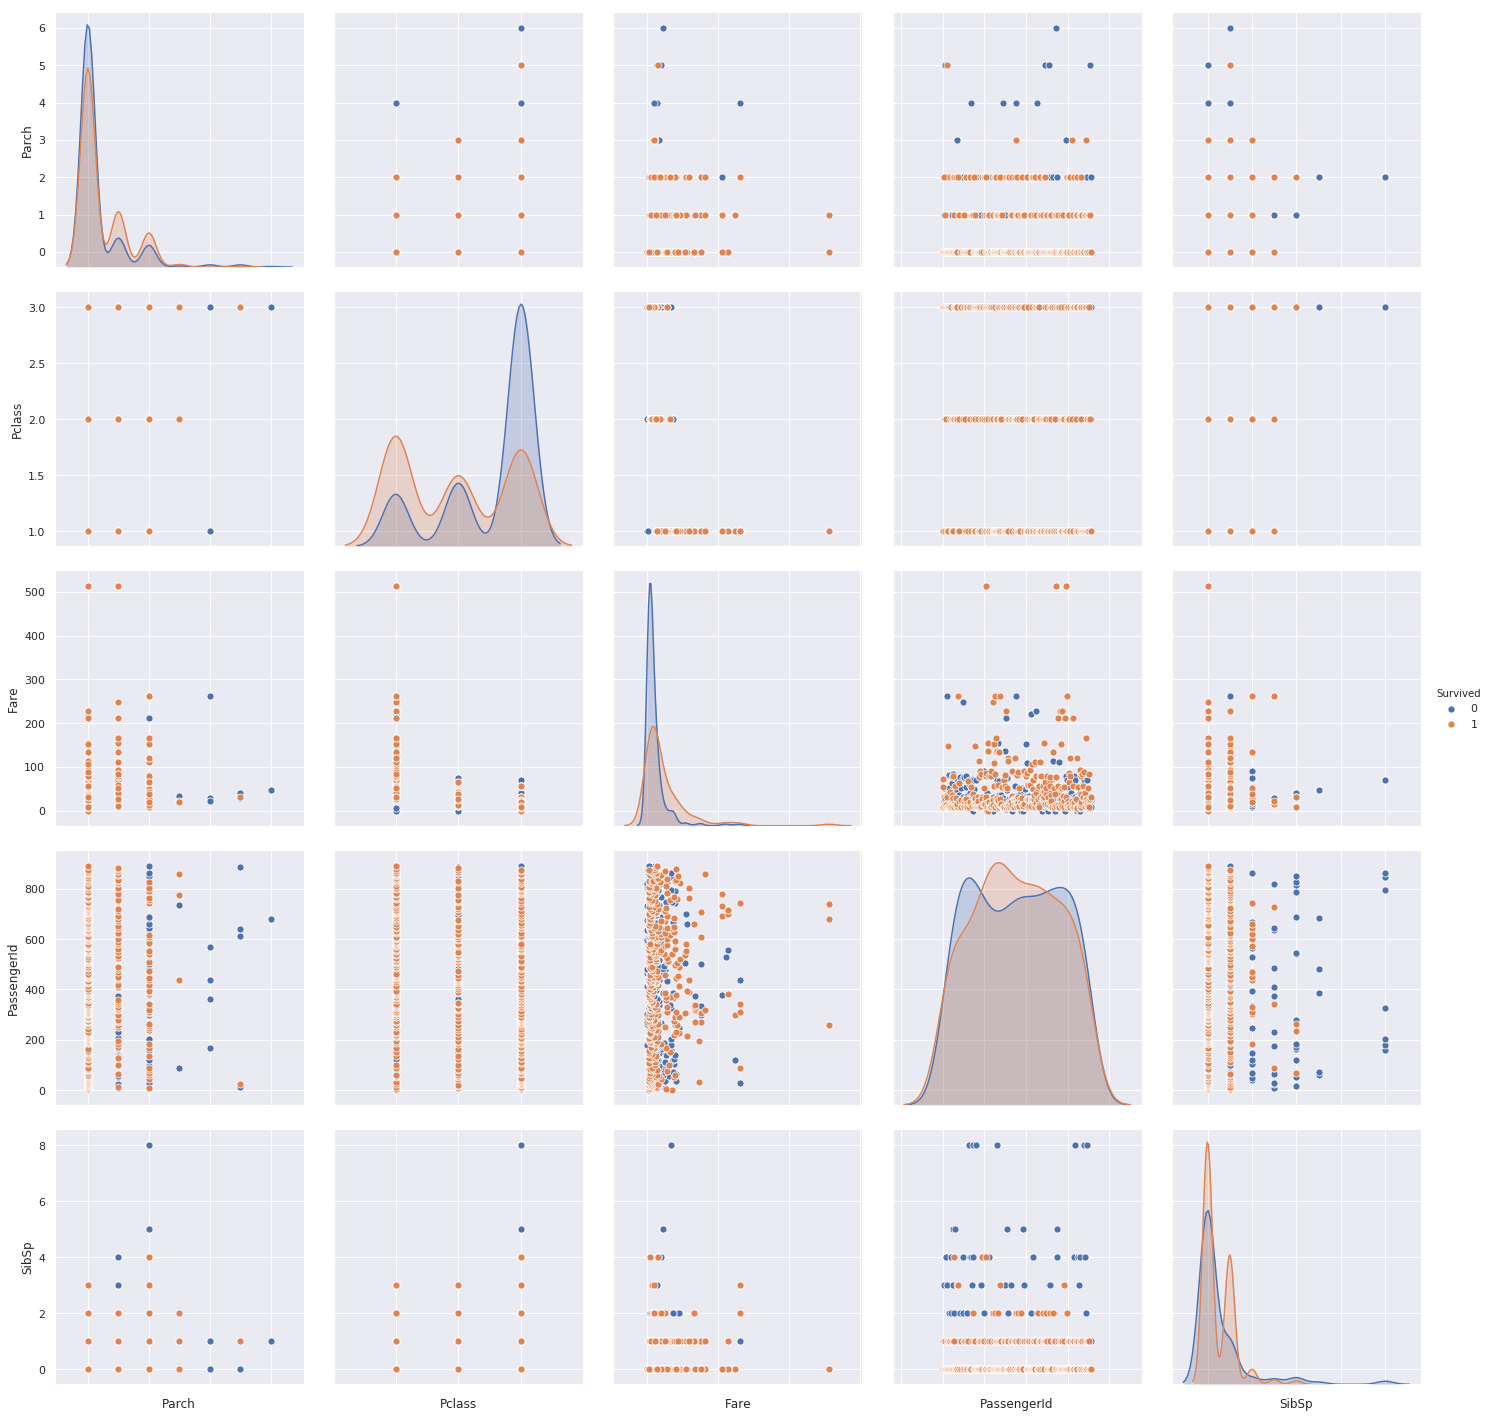

In [45]:
# Caso queira apenas algumas variaveis
#lista_vars = ['Pclass','SibSp','Parch']

TuringDVPairPlot(df_00,lista_vars,targetname='Survived',sizegraph=4,plot_s = 50)

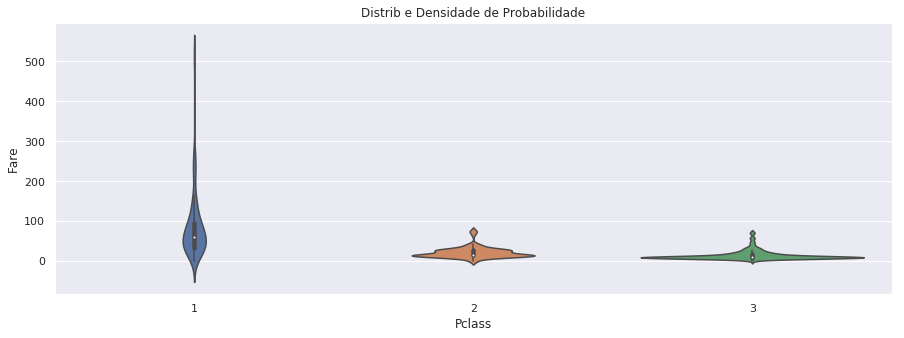

'TuringViolinPlot'

In [48]:
TuringViolinPlot(df_00,'Pclass','Fare',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

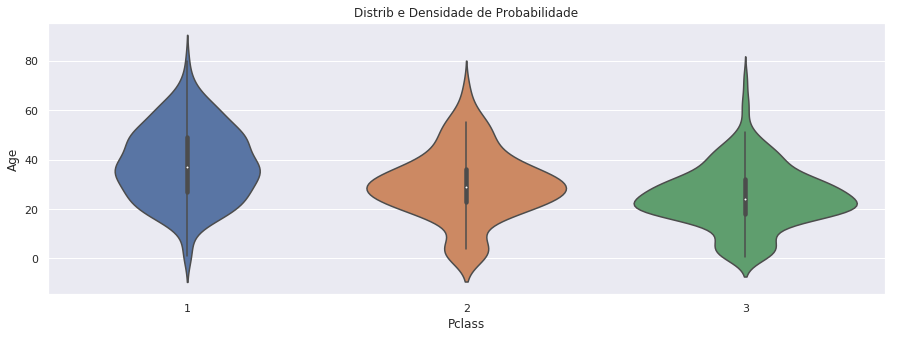

'TuringViolinPlot'

In [49]:
TuringViolinPlot(df_00,'Pclass','Age',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

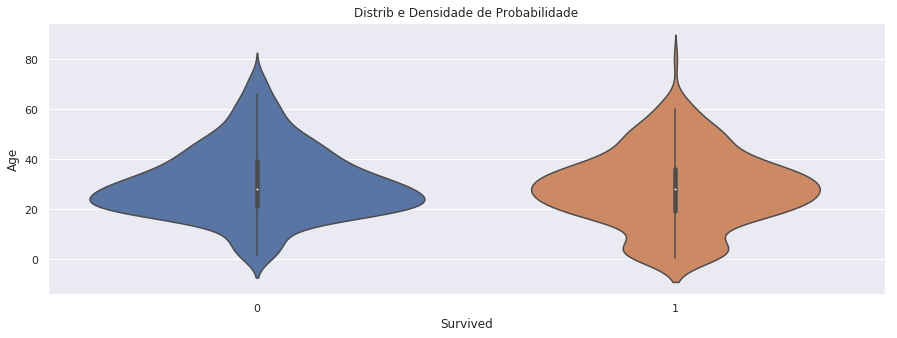

'TuringViolinPlot'

In [50]:
TuringViolinPlot(df_00,'Survived','Age',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

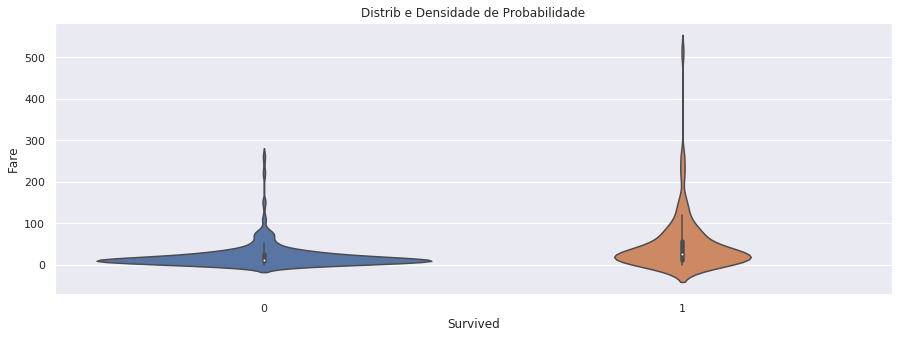

'TuringViolinPlot'

In [51]:
TuringViolinPlot(df_00,'Survived','Fare',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

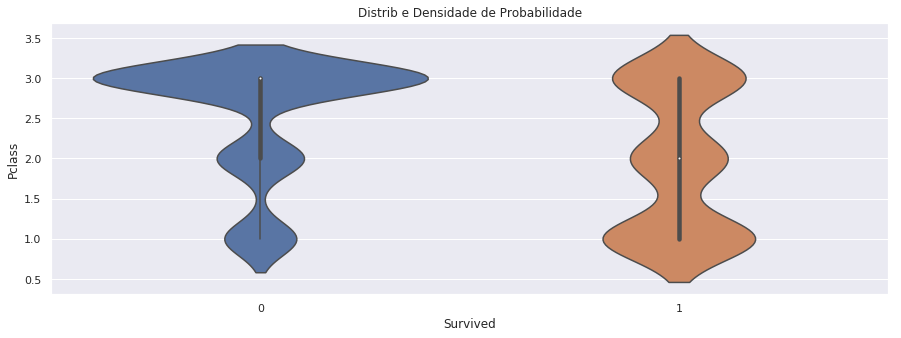

'TuringViolinPlot'

In [52]:
TuringViolinPlot(df_00,'Survived','Pclass',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

#### Aplicar a função para preparação de dados
    * Necessário criar um projeto no TuringLab
    * Execute o Timeline do menu Target Binário até a etapa de Ajuste de Metadados

#### Parametrização do projeto criado no TuringLab

In [53]:
#---------- Definição dos Parâmetros do projeto ---------------------------------
nm_bucket = 'turing-bkt-treinamentos'
id_projeto = '350001'
nm_file = 'titanic_kaggle_train.csv'
id_empresa = '1022' 
targetname = 'Survived'
abt_delimiter = ','

#---------- Gerando Credenciais para Acesso Seguro -------------------------------
id_modelo = id_projeto
schema = 'EMP_'+ id_empresa +'_Proj_'+ id_projeto
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)
schema_rds = 'EMP_'+id_empresa+'_Proj_'+id_projeto
mysq_conn,engine = TuringRDSManagementConn(id_empresa,schema_rds,turing_adm = 'N')
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'
s3_path = path_s3_wfile

Acesso RDS Turing Treinamentos


#### Aplicando Preparação de Dados na tabela original

In [59]:
polydeg=1
df_01,meta_stat,list_ids,df_exc_miss,a,b = TuringAnalyticsDataPrep(mysq_conn,df_00,schema_rds,targetname,pctmissreject=80,norm_woe=1)

------------------- Metadados -------------------
('Quantidade de IDs: ', 1)
('Quantidade de Explicativas: ', 10)
('Quantidade de Rejeitadas: ', 0)
('Quantidade de Targets: ', 1)
--------------------------------------------------
------------------- DataPrep ---------------------
('Quantidade de variaveis excluidas por terem mais de', 80, '% de missings:', 0)
Turing Data Prep: Variaveis Numericas
('Quantidade de variaveis explicativas numericas: ', 5)
('Quantidade de variaveis com tratamento de missings:', 5, 'de', 12)
('Quantidade de variaveis normalizadas:', 5, 'de', 12)
Turing Data Prep: Variaveis Nominais
('Quantidade de variaveis nominais(input): ', 2)
Gerando variaveis dummies...
('Quantidade de variaveis dummies: ', 5)


In [60]:
df_01.head()

,Fare,Parch,Age,Pclass,SibSp,TGD_Sex_female,TGD_Sex_male,TGD_Embarked_C,TGD_Embarked_Q,TGD_Embarked_S,Survived,WoE_REJECT
0,-0.502445,-0.473674,-0.592481,0.827377,0.432793,0,1,0,0,1,0,0
1,0.786845,-0.473674,0.638789,-1.566107,0.432793,1,0,1,0,0,1,0
2,-0.488854,-0.473674,-0.284663,0.827377,-0.474545,1,0,0,0,1,1,0
3,0.420730,-0.473674,0.407926,-1.566107,0.432793,1,0,0,0,1,1,0
4,-0.486337,-0.473674,0.407926,0.827377,-0.474545,0,1,0,0,1,0,0


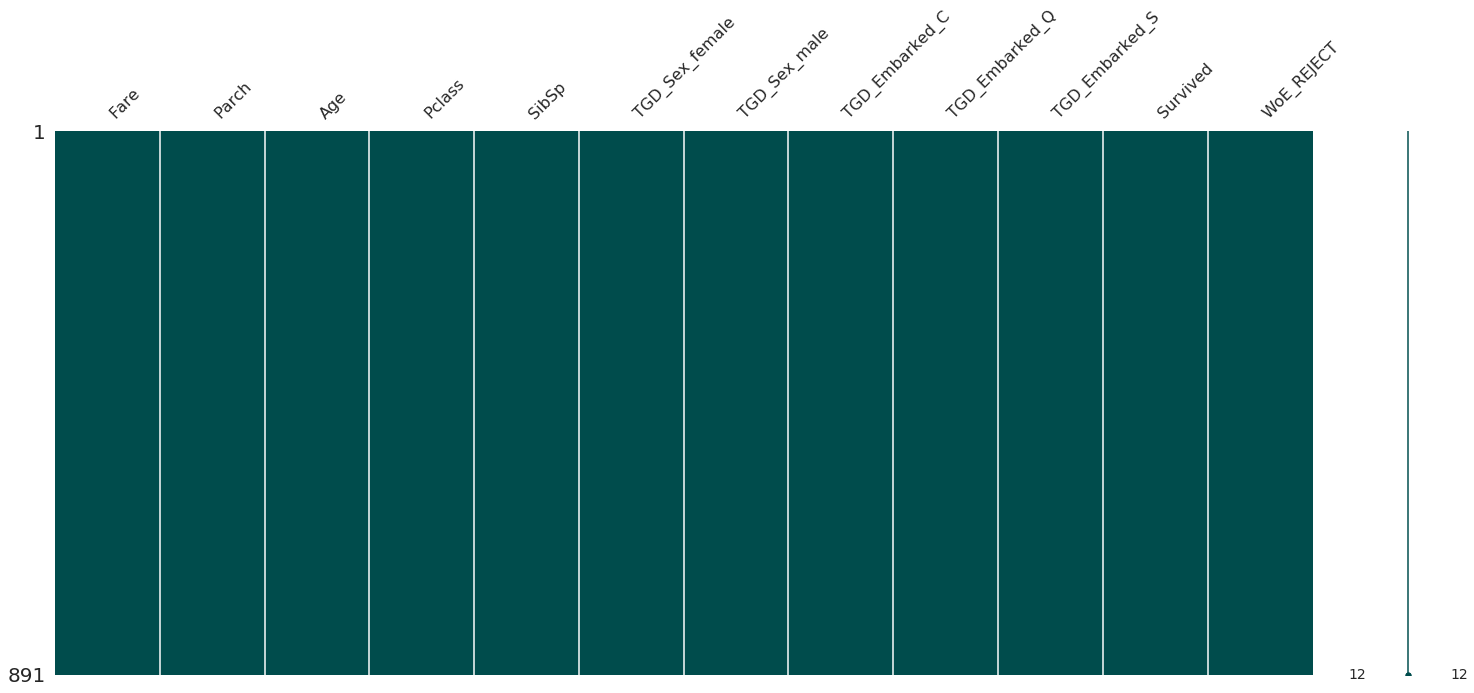

In [61]:
TuringMissingPlot(df_01)

Turing Visualização de Dados - PairPlot


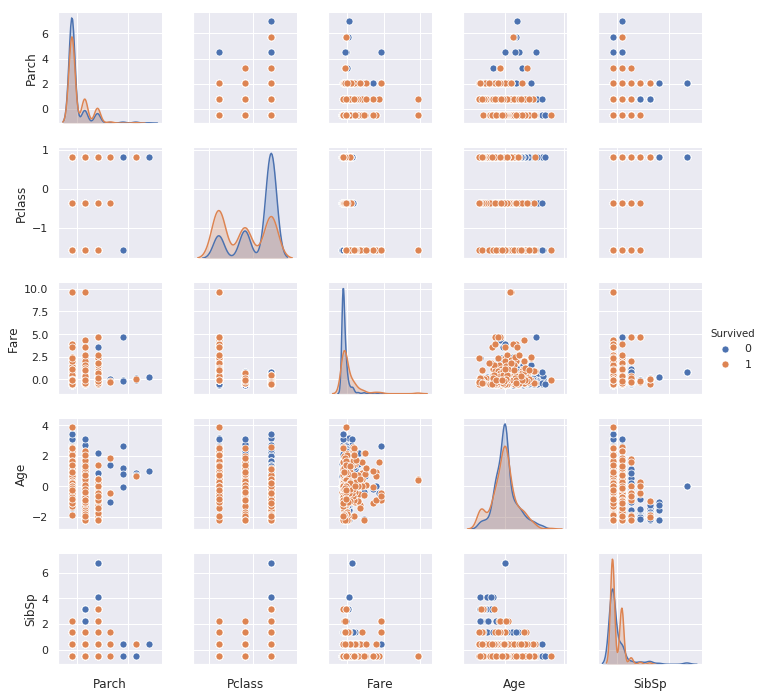

In [64]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_00.select_dtypes(include=numerics)
vars_num = set(df_numeric.columns)
lista_vars = list(vars_num - set(['Survived','PassengerId']))

TuringDVPairPlot(df_01,lista_vars,targetname='Survived',sizegraph=2,plot_s = 50)

'TuringNormalProbPlot'

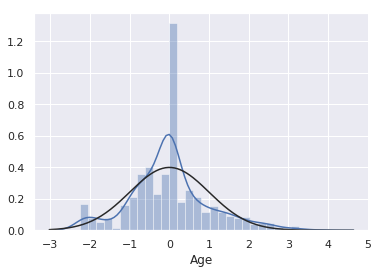

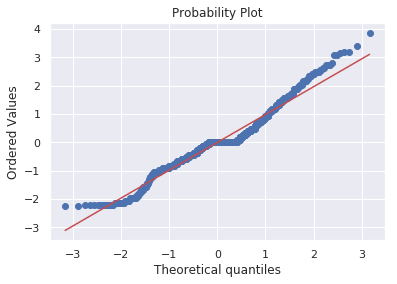

In [65]:
TuringNormalProbPlot(df_01,'Age')

'TuringNormalProbPlot'

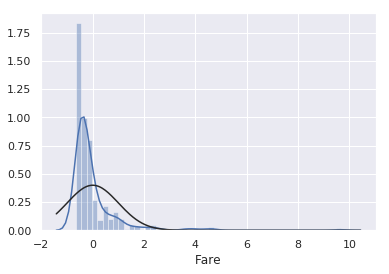

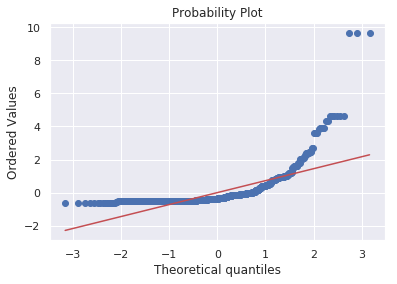

In [66]:
TuringNormalProbPlot(df_01,'Fare')

In [73]:
#Aplicando transformação log na variável 
#df_01['log_Fare'] = np.exp(df_01['Fare'])

In [75]:
#TuringNormalProbPlot(df_01,'log_Fare')

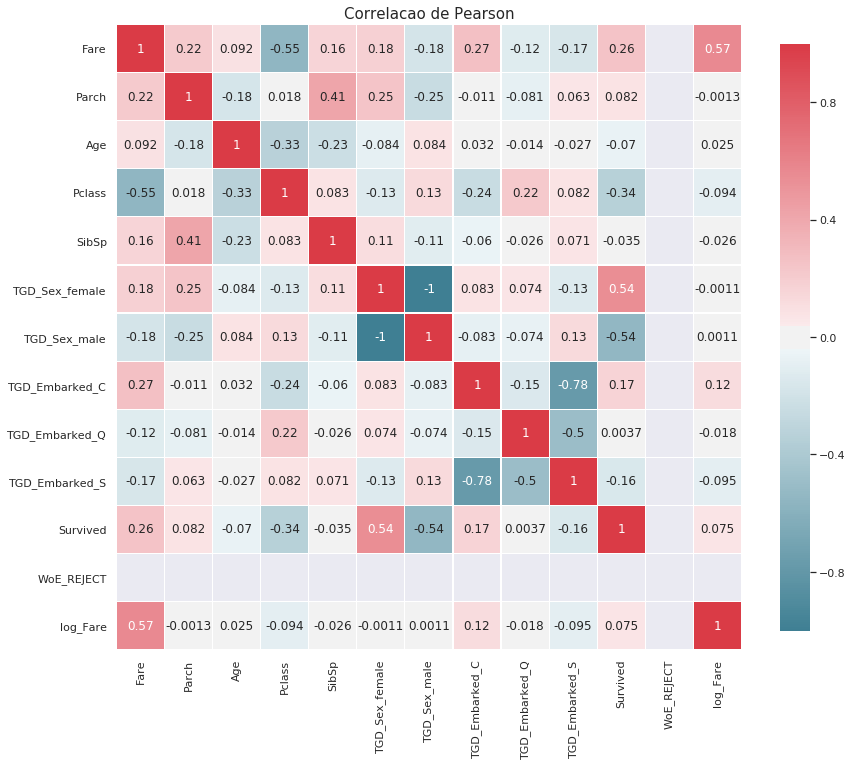

In [76]:
TuringPearsonCorr(df_01)

#### Calculando Correlação de Pearson com o Target

In [77]:
person_order = TuringPearsonCorrTarget(df_01,targetname)
person_order

,index,Survived,Variaveis
10,Survived,1.000000,Survived
5,TGD_Sex_female,0.543351,TGD_Sex_female
0,Fare,0.257307,Fare
7,TGD_Embarked_C,0.168240,TGD_Embarked_C
1,Parch,0.081629,Parch
12,log_Fare,0.074769,log_Fare
8,TGD_Embarked_Q,0.003650,TGD_Embarked_Q
4,SibSp,-0.035322,SibSp
2,Age,-0.069809,Age
9,TGD_Embarked_S,-0.155660,TGD_Embarked_S


In [80]:
xsel, imp, vars_modelo_imp_aux  = TuringVariableImportance('gbk',df_01,targetname,'Supervisionado')
imp.sort_values(by='Importancia', ascending=False).head(10)

,Variaveis,Importancia
0,TGD_Sex_male,0.340
1,Pclass,0.149
2,TGD_Sex_female,0.133
3,Age,0.123
4,log_Fare,0.111
5,Fare,0.059
6,SibSp,0.056
7,TGD_Embarked_S,0.016
8,Parch,0.004
9,TGD_Embarked_C,0.004
